In [ ]:
import requests
import random
import time
import matplotlib.pyplot as plt

base_url = "https://api.github.com/users"
per_page = 100

# Sample value for test run
total_users = 10000
access_token = "Insert your Github Access Token(alpha-numeric)"

# Setting bucket size & sample size for experimentation
bucket_size = 100
sample_size = 10

total_buckets = total_users // bucket_size
sampled_buckets = random.sample(range(1, total_buckets + 1), k=sample_size)

estimated_active_users = 0
bucket_counts = []

In [2]:
# Data Crawling

def make_request(start_id, end_id):
    total_active_users = 0
    current_id = start_id

    while current_id <= end_id:
        params = {"per_page": per_page, "since": current_id}
        headers = {"Authorization": f"Bearer {access_token}"}
        response = requests.get(base_url, params=params, headers=headers)

        if response.status_code == 200:
            users = response.json()
            total_active_users += sum(start_id <= user["id"] <= end_id for user in users)
            current_id = users[-1]["id"] + 1 if users else end_id + 1
        else:
            print(f"Error: {response.status_code}")
            current_id = end_id + 1  
        time.sleep(5)

    return total_active_users

In [3]:
for bucket in sampled_buckets:
    start_id = (bucket - 1) * bucket_size + 1
    end_id = min(bucket * bucket_size, total_users)
    
    # Printing the bucket range for each one
    print(f"Bucket {bucket}: start_id = {start_id}, end_id = {end_id}")

    active_users_in_bucket = make_request(start_id, end_id)

    estimated_active_users += active_users_in_bucket
    bucket_counts.append(active_users_in_bucket)

Bucket 50: start_id = 4901, end_id = 5000
Bucket 4: start_id = 301, end_id = 400
Bucket 68: start_id = 6701, end_id = 6800
Bucket 55: start_id = 5401, end_id = 5500
Bucket 48: start_id = 4701, end_id = 4800
Bucket 75: start_id = 7401, end_id = 7500
Bucket 87: start_id = 8601, end_id = 8700
Bucket 42: start_id = 4101, end_id = 4200
Bucket 67: start_id = 6601, end_id = 6700
Bucket 26: start_id = 2501, end_id = 2600


In [4]:
# Estimation

average_active_users = estimated_active_users / sample_size
print(f"Average active users: {average_active_users}")

estimated_total_active_users = average_active_users * total_buckets
print(f"Estimated total number of active users: {estimated_total_active_users}")


Average active users: 93.9
Estimated total number of active users: 9390.0


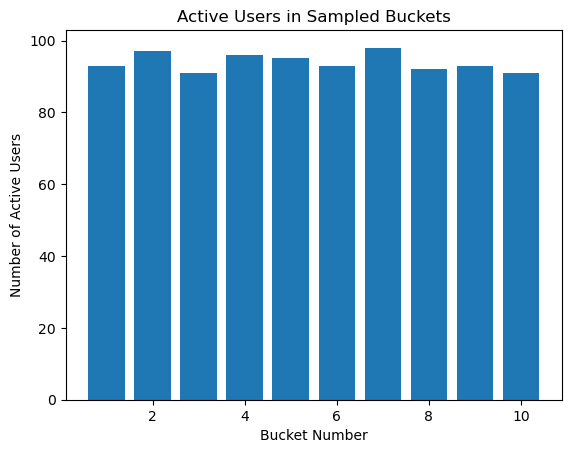

In [5]:
plt.bar(range(1, sample_size + 1), bucket_counts)
plt.xlabel('Bucket Number')
plt.ylabel('Number of Active Users')
plt.title('Active Users in Sampled Buckets')
plt.show()

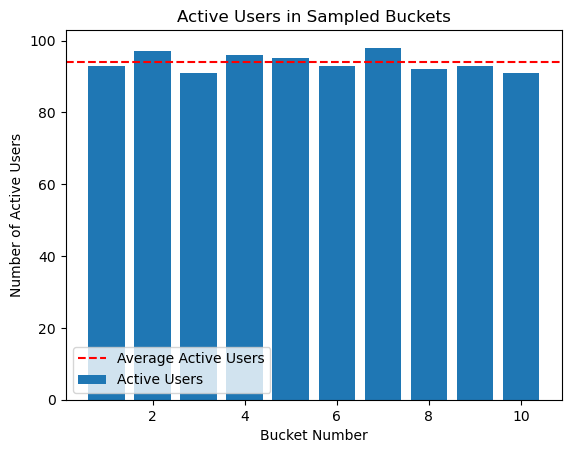

In [6]:
plt.bar(range(1, sample_size + 1), bucket_counts, label='Active Users')
plt.axhline(y=average_active_users, color='r', linestyle='--', label='Average Active Users')

plt.xlabel('Bucket Number')
plt.ylabel('Number of Active Users')
plt.title('Active Users in Sampled Buckets')
plt.legend()  
plt.show()